# METIS LMS Efficiency

This notebook demonstrates the effect `MetisLMSEfficiency`. Here we use it standalone to reproduce Figure 6 from E-REP-ATC-MET-1016 (v1.0) to show that the effect computes the efficiency correctly.

In [6]:
import numpy as np
from astropy import units as u
from matplotlib import pyplot as plt

import scopesim as sim
from scopesim.effects.metis_lms_trace_list import MetisLMSEfficiency

sim.bug_report()

# Edit this path if you have a custom install directory, otherwise comment it out.
sim.link_irdb("../../../../")

Python:
3.10.18 (main, Jun  5 2025, 13:08:10) [GCC 11.2.0]

Installed Python packages:
           anisocado: 0.3.0
         astar-utils: 0.3.3
             astropy: 6.1.7
      beautifulsoup4: 4.13.4
            docutils: 0.19
               httpx: 0.28.1
                lxml: 5.4.0
          matplotlib: 3.10.5
      more-itertools: 10.7.0
               numpy: 1.26.4
           packaging: 25.0
               pooch: 1.8.2
              pyyaml: 6.0.2
               scipy: 1.15.3
            scopesim: 0.10.0
       scopesim_data: could not be loaded.
  scopesim_templates: 0.6.2
         skycalc-ipy: 0.5.3
             synphot: 1.6.0
                tqdm: 4.67.1

Installed IRDB packages:
                    bin: version number not available.
                   boot: version number not available.
                    dev: version number not available.
                    etc: version number not available.
                   home: version number not available.
                    lib: versio

If you haven't got the instrument package yet, uncomment the following cell. The METIS package provides the spectral trace definition file. The ELT and Armazones packages are not needed for the purposes of this notebook.

In [ ]:
# sim.download_packages("METIS")

When simulating an LMS observation, the user selects a target wavelength by setting `cmd['!OBS.wavelen']`, e.g. 4.2 (microns). In normal use, the efficiency is instantiated as an effect within the `OpticalTrain`. Here, we instantiate the effect directly as

In [7]:
eff = MetisLMSEfficiency(wavelen=4.2, filename="../../../TRACE_LMS.fits")

astar.scopesim.utils - ERROR: File cannot be found: ../../../TRACE_LMS.fits
astar.scopesim.utils - ERROR: File cannot be found: ../../../TRACE_LMS.fits
astar.scopesim.utils - ERROR: File cannot be found: ../../../TRACE_LMS.fits


ValueError: Empty filename: None

The effect automatically selects the echelle order for that wavelength and computes the grating efficiency.

In [3]:
print(eff.meta["order"])

NameError: name 'eff' is not defined

In [4]:
eff.surface.transmission.plot()

NameError: name 'eff' is not defined

Alternatively, the order can be specified directly. This is used in the following to plot the efficiencies for all orders. The resulting figure can be compared to the original figure from E-REP-ATC-MET-1016.

astar.scopesim.utils - ERROR: File cannot be found: ../../../TRACE_LMS.fits
astar.scopesim.utils - ERROR: File cannot be found: ../../../TRACE_LMS.fits
astar.scopesim.utils - ERROR: File cannot be found: ../../../TRACE_LMS.fits


ValueError: Empty filename: None

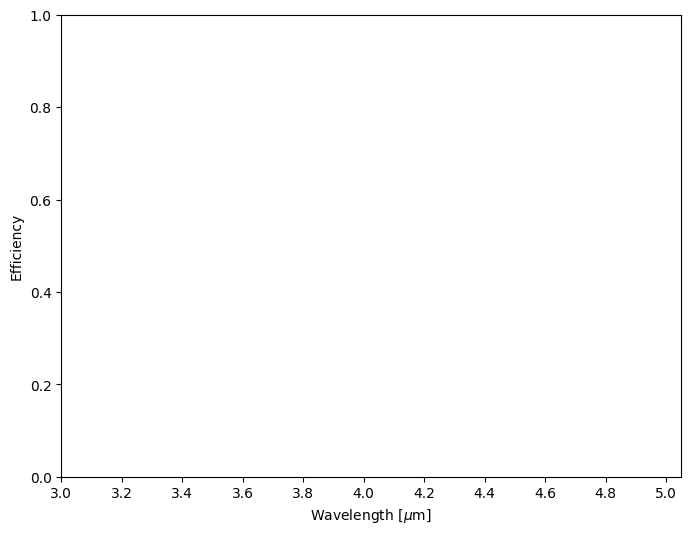

In [5]:
plt.figure(figsize=(8, 6))
plt.ylim(0, 1)
plt.xlim(3.0, 5.05)
plt.xlabel(r"Wavelength [$\mu$m]")
plt.ylabel("Efficiency")
plt.xticks(np.arange(3.0, 5.05, 0.2))
for order in np.arange(22, 37):
    eff = MetisLMSEfficiency(order=order, filename="../../../TRACE_LMS.fits")
    lam = eff.surface.transmission.waveset
    effic = eff.surface.transmission(lam)
    lammax = lam[np.argmax(effic)]
    p = plt.plot(lam.to(u.um), eff.surface.transmission(lam))
    plt.text(lammax.to(u.um).value, 0.76, str(order), ha="center", color=p[0].get_color())